In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-drone-dataset/class_dict_seg.csv
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/173.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/491.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/043.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/248.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/038.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/480.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/236.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/083.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/513.png
/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_da

In [12]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import tensorflow as tf

import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate

In [13]:
labels = pd.read_csv('../input/semantic-drone-dataset/class_dict_seg.csv')
labels

,name,r,g,b
0,unlabeled,0,0,0
1,paved-area,128,64,128
2,dirt,130,76,0
3,grass,0,102,0
4,gravel,112,103,87
5,water,28,42,168
6,rocks,48,41,30
7,pool,0,50,89
8,vegetation,107,142,35
9,roof,70,70,70


In [14]:
labels.name

0       unlabeled
1      paved-area
2            dirt
3           grass
4          gravel
5           water
6           rocks
7            pool
8      vegetation
9            roof
10           wall
11         window
12           door
13          fence
14     fence-pole
15         person
16            dog
17            car
18        bicycle
19           tree
20      bald-tree
21      ar-marker
22       obstacle
23    conflicting
Name: name, dtype: object

In [46]:
inp_dir = '../input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images'

mask_dir = '../input/semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks'

In [47]:
def print_label_colors():
    '''
    This method is just to print the label and their colors for reference
    '''
    for index,label in enumerate(labels.name):
        plt.subplot(6,4,index+1)
        (r,g,b)=labels.iloc[index].values[1:]
        img_ = np.array([[[r,g,b],[r,g,b],[r,g,b],[r,g,b]]])
        plt.title(label)
        plt.imshow(img_)
        plt.axis('off')

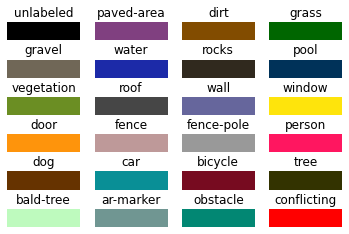

In [17]:
print_label_colors()

In [48]:
import os
inp_list = os.listdir(inp_dir)
mask_list=os.listdir(mask_dir)

In [20]:
inp_list.sort()
mask_list.sort()

In [21]:
inp_img_list = [os.path.join(inp_dir,i) for i in inp_list]
mask_list = [os.path.join(mask_dir,i) for i in mask_list]

In [54]:
from PIL import Image

In [55]:
import glob
train_path = r"../input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images"
def importing_data(path):
    sample = []
    for filename in glob.glob(path):
        img = Image.open(filename,'r')
        img = img.resize((256,256))
        img = np.array(img)
        sample.append(img)  
    return sample


In [56]:
data_train   = importing_data(train_path)
#data_train = np.asarray(data_train)

IsADirectoryError: [Errno 21] Is a directory: '../input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images'

In [39]:
def plt_image_and_mask_by_path(img_list,mask_lst,n=3):
  for i in range(3):
    img1=imageio.imread(img_list[i])
    mask1=imageio.imread(mask_lst[i])
    _,arr = plt.subplots(1,2,figsize=(10,10))
    arr[0].imshow(img1)
    arr[0].axis('off')
    arr[1].imshow(mask1)
    arr[1].axis('off')

In [23]:
def plt_image_and_mask_with_dataset(image_ds,mask_ds):
    _,arr = plt.subplots(1,2,figsize=(10,10))
    arr[0].imshow(tf.keras.preprocessing.image.array_to_img(image_ds))
    arr[0].axis('off')
    arr[1].imshow(tf.keras.preprocessing.image.array_to_img(mask_ds))
    arr[1].axis('off')
        

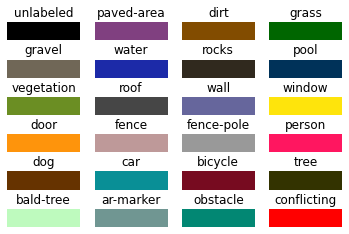

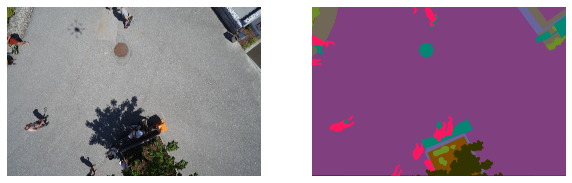

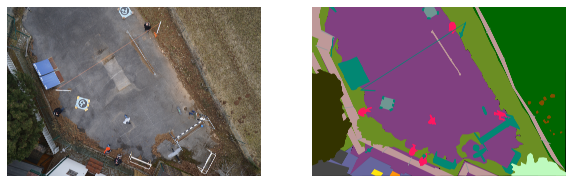

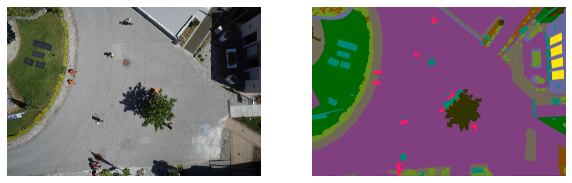

In [24]:
print_label_colors()
plt_image_and_mask_by_path(inp_img_list,mask_list,3)

In [25]:
# create images paths as tensors of file paths
image_names  = tf.constant(inp_img_list)
mask_names = tf.constant(mask_list)

dataset = tf.data.Dataset.from_tensor_slices((image_names,mask_names))
for image,mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'../input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/000.jpg', shape=(), dtype=string)
tf.Tensor(b'../input/semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/000.png', shape=(), dtype=string)


2022-10-15 14:56:43.498721: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [26]:
# create images paths as tensors of file paths
image_names  = tf.constant(inp_img_list)
mask_names = tf.constant(mask_list)

dataset = tf.data.Dataset.from_tensor_slices((image_names,mask_names))
for image,mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'../input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/000.jpg', shape=(), dtype=string)
tf.Tensor(b'../input/semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/000.png', shape=(), dtype=string)


In [29]:
def process_path(image_,mask_):
    img = tf.io.read_file(image_)
    img = tf.image.decode_png(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    
    mask = tf.io.read_file(mask_)
    mask = tf.image.decode_png(mask,channels=3)
    ## take max of each pixel vector along channels axis, but keep the dimensions
    ## this is to make training faster(at least compared to 3 channeled mask images)
    ## once we do this , true mask images and new mask images differ by colors of each class
    ## and images are reduced in quality
    mask = tf.math.reduce_max(mask,axis=-1,keepdims=True)
    return img,mask

def process(image,mask):
    '''
    reduce the image size
    '''
    inp_image = tf.image.resize(image,(96,128),method='nearest')
    inp_mask = tf.image.resize(mask,(96,128),method='nearest')   
    return inp_image,inp_mask
    
image_ds = dataset.map(process_path)
processed_images_ds = image_ds.map(process)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


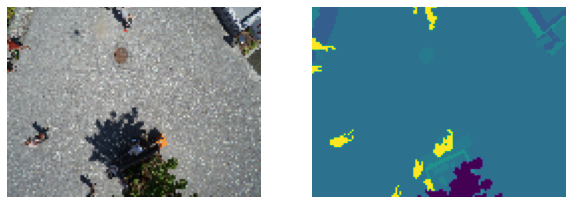

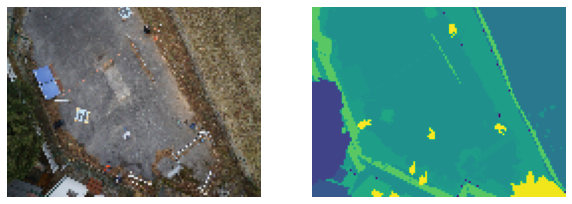

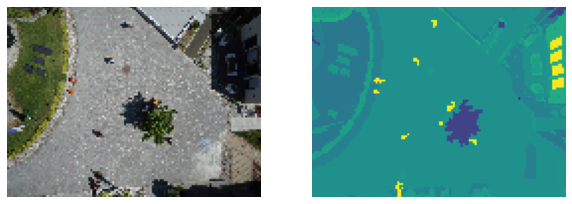

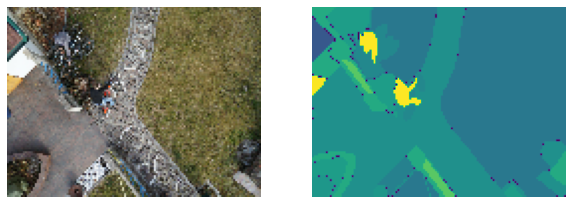

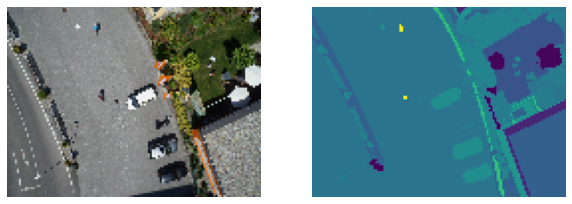

In [30]:
for image,mask in processed_images_ds.take(5):
    plt_image_and_mask_with_dataset(image,mask)


In [34]:
# UNQ_C1
# GRADED FUNCTION: conv_block
def conv_block(inputs=None, n_filters=64, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block
    
    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns: 
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    ### START CODE HERE
    conv = Conv2D(n_filters, # Number of filters
                  kernel_size=3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(inputs)
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(conv)
    ### END CODE HERE
    
    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
         ### START CODE HERE
        conv = Dropout(dropout_prob)(conv)
         ### END CODE HERE
         
        
    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        ### START CODE HERE
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)
        ### END CODE HERE
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

In [37]:

    up = Conv2DTranspose(
                 filters=n_filters,    # number of filters
                 kernel_size=(3,3),    # Kernel size
                 strides=(2,2),
                 padding='same')(expansive_input)
    
    # Merge the previous output and the contractive_input
    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(filters=n_filters,   # Number of filters
                 kernel_size=(3,3),     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(merge)
    conv = Conv2D(n_filters,  # Number of filters
                 kernel_size=(3,3),   # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(conv)
    ### END CODE HERE
    
    return conv

NameError: name 'n_filters' is not defined